In [24]:
! pip install -q kaggle
#from google.colab import files
#files.upload()

In [25]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

#! kaggle datasets download -d mirichoi0218/insurance

#! unzip insurance.zip -d health-insurance

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [26]:
! kaggle datasets download -d mirichoi0218/insurance

! unzip insurance.zip -d health-insurance

insurance.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  insurance.zip
replace health-insurance/insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: health-insurance/insurance.csv  


## **Importing Libraries**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats  
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, cross_val_predict
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
import numpy as np
import pickle

## **Reading and summarizing the data**

In [40]:
health_ins_df = pd.read_csv("health-insurance/insurance.csv")

In [41]:
health_ins_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
health_ins_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [43]:
health_ins_df.shape
#There are 1338 rows and 7 columns

(1338, 7)

In [30]:
health_ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
health_ins_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **Data Cleaning and Exploratory Data Analysis**

In [32]:
#Finding null values
health_ins_df.isnull().sum()

#There are no null values in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### **Visualizing numerical variables**

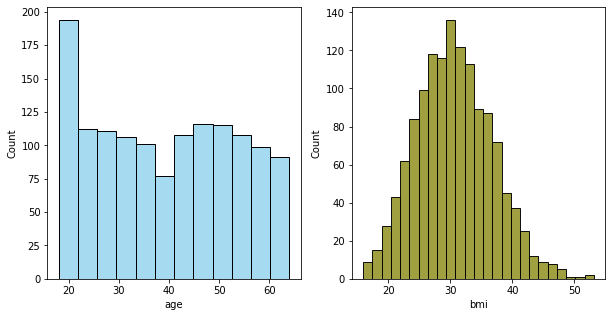

In [33]:
#Visualizing age column with a histogram
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.histplot( health_ins_df['age'] , color="skyblue",ax=axes[0])
sns.histplot( health_ins_df['bmi'] , color="olive",ax=axes[1])
plt.show()

*   We will convert age into age bracket
*   BMI is close to normal distribution

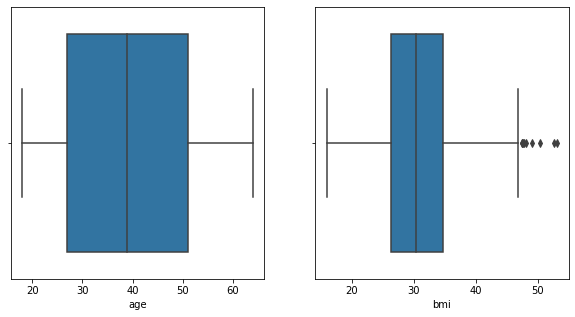

In [34]:
#Visualizing age column with a boxplot
fig,axes=plt.subplots(1,2,figsize=(10,5))

sns.boxplot(x = 'age', data = health_ins_df, ax=axes[0])
sns.boxplot(x = 'bmi', data = health_ins_df, ax=axes[1])

plt.show()

In [35]:
#Finding the outlier values in the bmi column
outlier_list = boxplot_stats(health_ins_df.bmi).pop(0)['fliers'].tolist()
print(outlier_list)

#Finding the number of rows containing outliers
outlier_bmi_rows = health_ins_df[health_ins_df.bmi.isin(outlier_list)].shape[0]
print("Number of rows contaning outliers in bmi : ", outlier_bmi_rows)

#Percentage of rows which are outliers
percent_bmi_outlier = (outlier_bmi_rows/health_ins_df.shape[0])*100
print("Percentage of outliers in bmi columns : ", percent_bmi_outlier)

[49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]
Number of rows contaning outliers in bmi :  9
Percentage of outliers in bmi columns :  0.672645739910314


The outlier % is neglible (0.67%). Hence these rows can be dropped

### **Data Transformation of Numerical Variables**

In [36]:
#Converting age into age brackets
print("Minimum value for age : ", health_ins_df['age'].min(),"\nMaximum value for age : ", health_ins_df['age'].max())

#Age between 18 to 40 years will fall under young
#Age between 41 to 58 years will fall under mid-age
#Age above 58 years will fall under old age

health_ins_df.loc[(health_ins_df['age'] >=18) & (health_ins_df['age'] <= 40), 'age_group'] = 'young'
health_ins_df.loc[(health_ins_df['age'] >= 41) & (health_ins_df['age'] <= 58), 'age_group'] = 'mid-age'
health_ins_df.loc[health_ins_df['age'] > 58, 'age_group'] = 'old'


Minimum value for age :  18 
Maximum value for age :  64


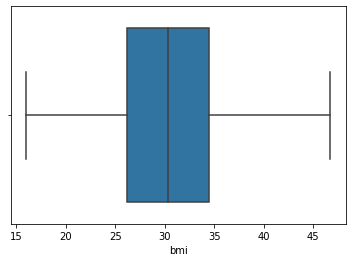

In [37]:
#Removing outier from bmi column
health_ins_df_clean = health_ins_df[~health_ins_df.bmi.isin(outlier_list)]
sns.boxplot(x = 'bmi', data = health_ins_df_clean)

### **Visualizing categorical variables**

## **Model Building**

### **Data Pre-processing**

### **Building base model**

### **Building advanced model using Decision Tree Regressor**

### **Building advanced model using Gradient Boosting**

## **Saving the model**